In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
df = pd.read_csv('heart.csv')

In [250]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Column Information
- **Age:** age of the patient [years]
- **Sex:** sex of the patient [M: Male, F: Female]
- **ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP:** resting blood pressure [mm Hg]
- **Cholesterol:** serum cholesterol [mm/dl]
- **FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]
- **Oldpeak:** oldpeak = ST [Numeric value measured in depression]
- **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
<br> <br>
- **HeartDisease:** our target variable [1: heart disease, 0: Normal]

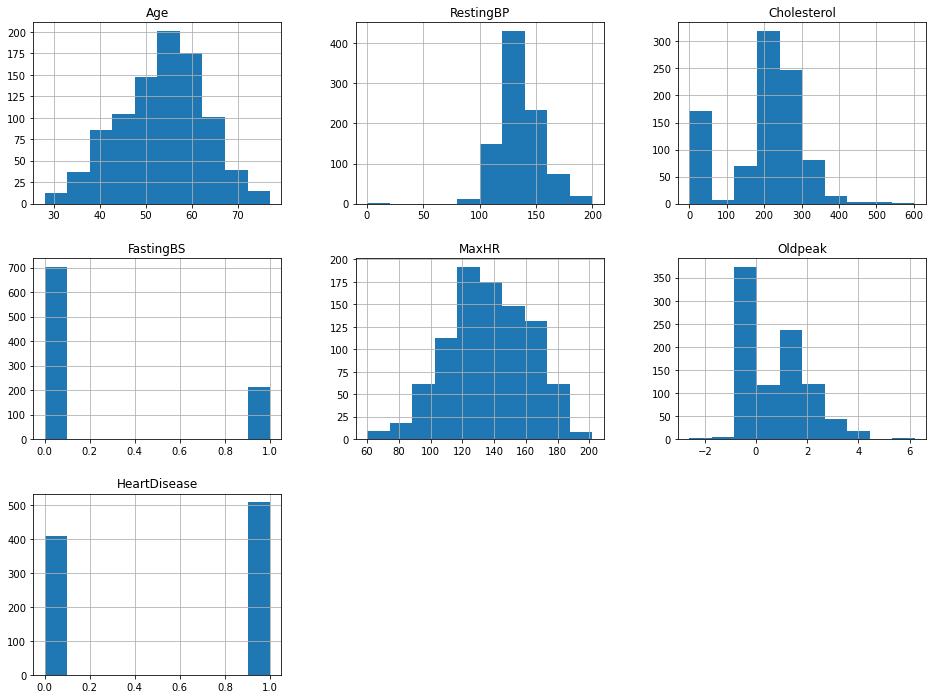

In [251]:
df.hist(figsize=(16, 12)) ;

In [252]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**No missing values.**

In [253]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [254]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [255]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [256]:
num = df.select_dtypes(include=['int64']).columns.values
cat = df.select_dtypes(include=['object']).columns.values

In [257]:
df.shape

(918, 12)

**In the graphs below we can see that men are more likely to have heart disease. We also see that the chest pain type ASY, exercise induced angina, and a flat st slope more are more likely to have heart disease.**

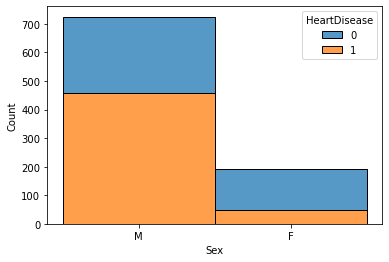

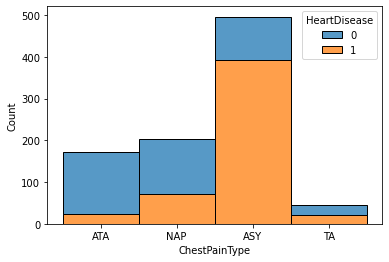

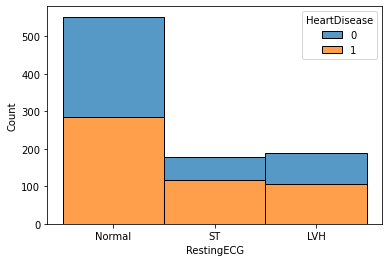

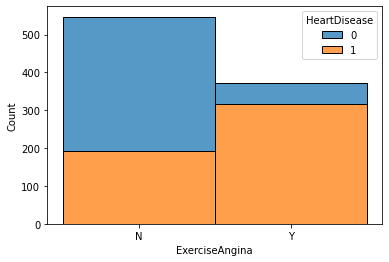

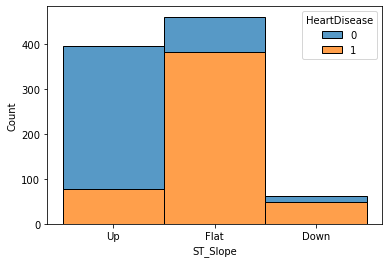

In [258]:
for column in cat:
    plt.subplots()
    sns.histplot(data=df, x=column, hue='HeartDisease', multiple='stack')

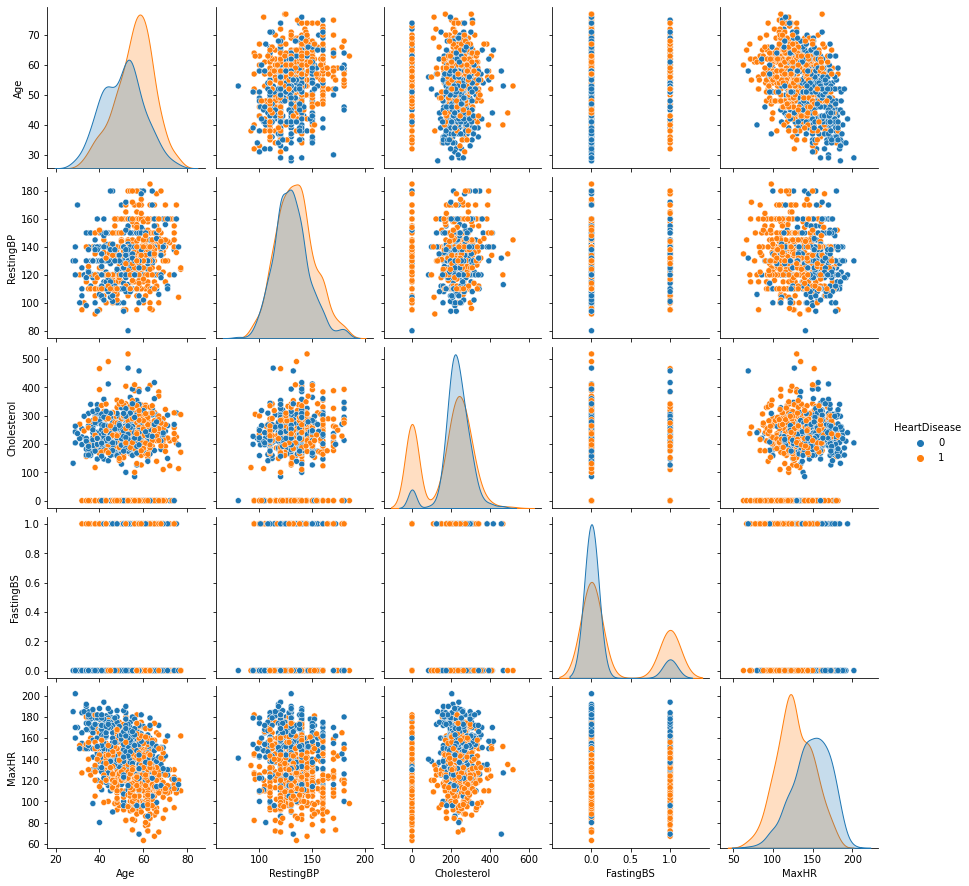

In [283]:
sns.pairplot(df[num], hue='HeartDisease')
plt.show()

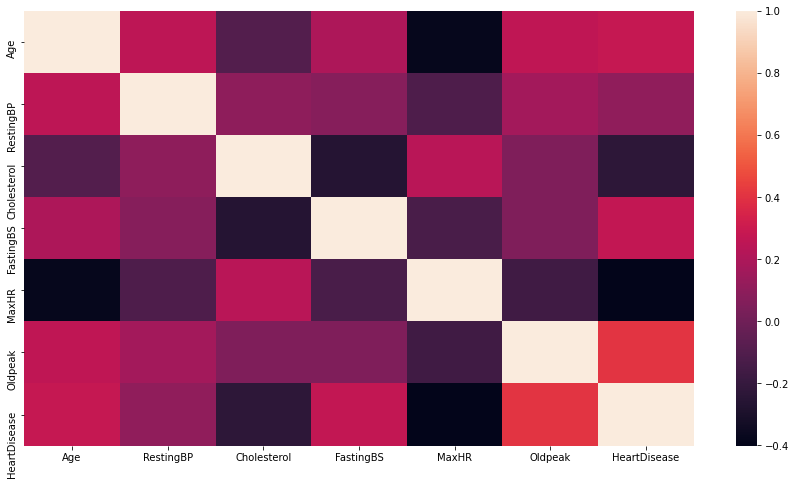

In [259]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())
plt.show()

**We can use boxplots to check for outliers.**

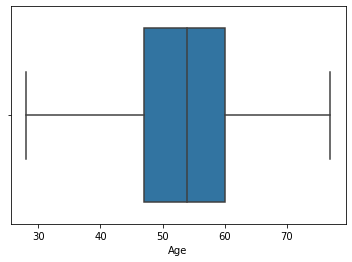

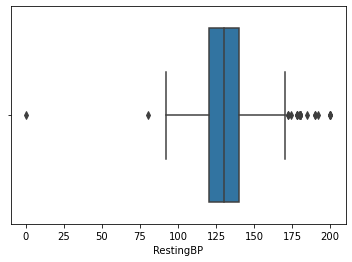

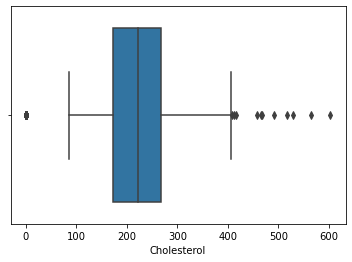

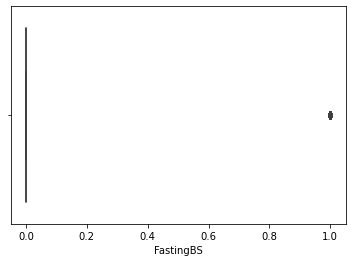

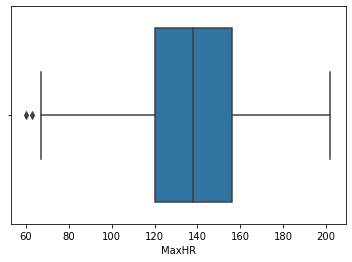

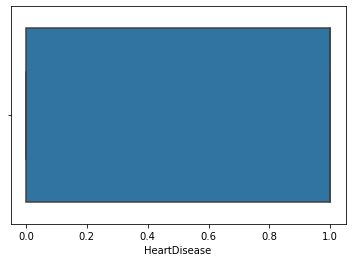

In [260]:
for column in num:
    plt.subplots()
    sns.boxplot(data=df, x=df[column])

In [261]:
outlier_columns = ['RestingBP', 'Cholesterol', 'MaxHR']

In [262]:
def remove_outliers(col):
    high_cut, low_cut = df[col].mean() + df[col].std()*3, df[col].mean() - df[col].std()*3
    df.drop(df[df[col] > high_cut].index, inplace=True)
    df.drop(df[df[col] < low_cut].index, inplace=True)

In [263]:
for col in outlier_columns:
    remove_outliers(col)

In [264]:
df.shape

(906, 12)

**We have removed 12 outliers.**

In [265]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**The last step is to create dummy variable of our categorical columns.**

In [266]:
cat

array(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
      dtype=object)

In [267]:
df_dummy = pd.get_dummies(df, prefix=cat, columns=cat, drop_first=True)

In [268]:
df_dummy.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


**I will test my models before and after standardizing my